# NetworkX
In the following section, please run the code and see the output result

---
## Undirected Graph

In [1]:
import networkx as nx

## Create the graph structure
G = nx.Graph()
## Add nodes
G.add_node(1)
print(G.nodes)
G.add_nodes_from([2, 3])
print(G.nodes)
G.add_node(1)
print(G.nodes)
print(G.nodes[1])

[1]
[1, 2, 3]
[1, 2, 3]
{}


In [2]:
## Add nodes while assign node attribute
G.add_nodes_from([
   (1, {"color": "blue"}),
   (4, {"color": "red", "shape": "rectangle"}),
   (5, {"color": "green"}),
])
print(G.nodes[1])
print(G.nodes[2])
print(G.nodes[4])
print(G.edges)

{'color': 'blue'}
{}
{'color': 'red', 'shape': 'rectangle'}
[]


In [3]:
## Generate graph with linearly connected nodes
H = nx.path_graph(10)
print(H.nodes)
print(H.edges)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]


In [4]:
## Add nodes from another graph
G.add_nodes_from(H)
print(G.nodes)
print(G.nodes[1])
print(G.edges)

[1, 2, 3, 4, 5, 0, 6, 7, 8, 9]
{'color': 'blue'}
[]


In [5]:
## Add edges
G.add_edge(1, 2)
print(G.edges)
G.add_edges_from([(1, 2), (1, 3), (1, 8)])
print(G.edges)
G.add_edges_from(H.edges)
print(G.edges)

[(1, 2)]
[(1, 2), (1, 3), (1, 8)]
[(1, 2), (1, 3), (1, 8), (1, 0), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]


In [6]:
## Removing all nodes and edges
G.clear()
print(G.nodes)
print(G.edges)

[]
[]


In [7]:
## Add edges while there's no corresponding nodes
G.add_edges_from([(1, 2), (1, 3)])
print(G.nodes)
print(G.edges)

[1, 2, 3]
[(1, 2), (1, 3)]


In [8]:
## Nodes can also be string variable
G.add_node("spam")
print(G.nodes)
G.add_nodes_from("spam")
print(G.nodes)

[1, 2, 3, 'spam']
[1, 2, 3, 'spam', 's', 'p', 'a', 'm']


In [9]:
## Calculate the number of nodes and edges
print(G.number_of_nodes())
print(G.number_of_edges())

8
2


In [10]:
## Type of nodes and edges
print(type(G.nodes), G.nodes)
print(type(G.edges), G.edges)
print(type(G.nodes[1]), G.nodes[1])
print(type(G.edges[(1,2)]), G.edges[(1,2)])

<class 'networkx.classes.reportviews.NodeView'> [1, 2, 3, 'spam', 's', 'p', 'a', 'm']
<class 'networkx.classes.reportviews.EdgeView'> [(1, 2), (1, 3)]
<class 'dict'> {}
<class 'dict'> {}


In [11]:
## Get the adjacency/neighbor nodes
print(G.adj[1], list(G.adj[1]))
print(G.neighbors(1), list(G.neighbors(1)))

{2: {}, 3: {}} [2, 3]
<dict_keyiterator object at 0x7f8d0f4299b0> [2, 3]


In [12]:
## Get the node degree
print(G.degree[1], G.degree[2], G.degree[3])
print(type(G.degree([1, 3])), G.degree([1, 3]), dict(G.degree([1, 3])))

2 1 1
<class 'networkx.classes.reportviews.DegreeView'> [(1, 2), (3, 1)] {1: 2, 3: 1}


In [13]:
## Remove elements from a graph
print(G.nodes)
G.remove_node(2)
print(G.nodes)

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']
[1, 3, 'spam', 's', 'p', 'a', 'm']


In [14]:
## Edge constructor
G.clear()
print(G.nodes, G.edges)
G.add_edges_from([(1,2), (1,3)])
print(G.nodes, G.edges)
print('=============================================')
H = nx.DiGraph(G)
print(H.edges())
print('=============================================')
edgeList = [(0,1), (1,2), (2,3)]
H = nx.Graph(edgeList)
print(H.edges())

[] []
[1, 2, 3] [(1, 2), (1, 3)]
[(1, 2), (1, 3), (2, 1), (3, 1)]
[(0, 1), (1, 2), (2, 3)]


In [15]:
## Accessing edges and neighbors
G.nodes[3]['feature'] = 'shiny' # the node attribute
G[1][3]['action'] = 'buy' # the edge attribute
print(G[1], type(G[1])) # same as G.adj[1]
print(G[1][3], type(G[1][3])) ## same as "print(G.edges[1, 3], type(G.edges[1, 3]))"

{2: {}, 3: {'action': 'buy'}} <class 'networkx.classes.coreviews.AtlasView'>
{'action': 'buy'} <class 'dict'>


In [16]:
## Add the weighted edges, and iterate all the edges and features of a graph
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
print(FG[1][2])
FG[1][2]['action'] = 'hit'
FG[1][3]['action'] = 'punch'
FG[2][4]['action'] = 'hit'
FG[3][4]['action'] = 'pull'
print(FG[1][2])

print('=============================================')
for (u, v, feat) in FG.edges.data():
    print(u, v, feat)
print('=============================================')

for (u, v, weight) in FG.edges.data('weight'):
    print(u, v, weight)

{'weight': 0.125}
{'weight': 0.125, 'action': 'hit'}
1 2 {'weight': 0.125, 'action': 'hit'}
1 3 {'weight': 0.75, 'action': 'punch'}
2 4 {'weight': 1.2, 'action': 'hit'}
3 4 {'weight': 0.375, 'action': 'pull'}
1 2 0.125
1 3 0.75
2 4 1.2
3 4 0.375


In [17]:
# Node, Edge and Graph Attributes
G = nx.Graph(day='Friday')
print(G.graph)
print('=============================================')
G.add_node(1, time='5pm')
G.add_nodes_from([3, 5, 'test'], time='2pm')
print(G.nodes[1])
G.nodes[1]['room'] = 714
print(G.nodes)
print(G.nodes.data())
print('=============================================')
G.add_edge(1, 2, weight=4.7)
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
print(G.edges)
print(G.edges.data())
G[1][2]['weight'] = 4.8
G.edges[3, 4]['weight'] = 4.2
print(G.edges.data())

{'day': 'Friday'}
{'time': '5pm'}
[1, 3, 5, 'test']
[(1, {'time': '5pm', 'room': 714}), (3, {'time': '2pm'}), (5, {'time': '2pm'}), ('test', {'time': '2pm'})]
[(1, 2), (3, 4), (3, 2), (5, 4)]
[(1, 2, {'weight': 4.7, 'color': 'blue'}), (3, 4, {'color': 'red'}), (3, 2, {'weight': 8}), (5, 4, {'color': 'red'})]
[(1, 2, {'weight': 4.8, 'color': 'blue'}), (3, 4, {'color': 'red', 'weight': 4.2}), (3, 2, {'weight': 8}), (5, 4, {'color': 'red'})]


---
## Directed Graph

In [18]:
DG = nx.DiGraph()
DG.add_edges_from([(1,2), (1,4), (5,1)])
print(f'DG edges: {DG.edges()}')
print(f'DG degree of node 1: {DG.degree(1)}')
print(f'DG out degree of node 1: {DG.out_degree(1)}')
print('=============================================')
print(f'successors of node 1: {list(DG.successors(1))}')
print(f'neighbors of node 1: {list(DG.neighbors(1))}')
print('=============================================')
DG.add_weighted_edges_from([(3,4,0.4), (3,5,0.7), (7,3,0.2)])
print(f'DG out degree of node 3: {DG.degree(3)}')
print(f'DG out degree of node 3 with weight: {DG.degree(3, weight="weight")}')

DG edges: [(1, 2), (1, 4), (5, 1)]
DG degree of node 1: 3
DG out degree of node 1: 2
successors of node 1: [2, 4]
neighbors of node 1: [2, 4]
DG out degree of node 3: 3
DG out degree of node 3 with weight: 1.3


In [19]:
## Change directed graph to undirected graph
G = DG.to_undirected()  # or G = nx.Graph(DG)
print(G.edges)
print(DG.edges)

[(1, 2), (1, 4), (1, 5), (4, 3), (5, 3), (3, 7)]
[(1, 2), (1, 4), (5, 1), (3, 4), (3, 5), (7, 3)]


---
## Graph generators and graph operations

In [20]:
K_5 = nx.complete_graph(5)
print(K_5.nodes)
print(K_5.edges)
print('=============================================')
K_3_5 = nx.complete_bipartite_graph(3, 5)
print(K_3_5.nodes)
print(K_3_5.edges)

[0, 1, 2, 3, 4]
[(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]
[0, 1, 2, 3, 4, 5, 6, 7]
[(0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7)]


In [21]:
## Get the subgraph
sub_K_5 = K_5.subgraph([2,3,1])
print(sub_K_5.nodes())
print(sub_K_5.edges())

[1, 2, 3]
[(1, 2), (1, 3), (2, 3)]


### Watts–Strogatz small-world graph

In [22]:
## create Watts–Strogatz small-world graph
ws = nx.watts_strogatz_graph(30, 3, 0.1)
print(ws.nodes())
print(ws.edges())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[(0, 1), (0, 29), (1, 10), (2, 3), (3, 4), (4, 5), (5, 6), (5, 22), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 19), (19, 20), (20, 21), (21, 22), (23, 24), (24, 25), (25, 27), (26, 27), (27, 28), (28, 29)]


In [23]:
## save a graph
nx.write_gml(ws, './small_world_graph.gml')

## load a graph
new_ws = nx.read_gml('./small_world_graph.gml')
print(new_ws.nodes())
print(new_ws.edges())
print('=============================================')
new_int_ws = nx.read_gml('./small_world_graph.gml', destringizer=int)
print(new_int_ws.nodes())
print(new_int_ws.edges())

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29']
[('0', '1'), ('0', '29'), ('1', '10'), ('2', '3'), ('3', '4'), ('4', '5'), ('5', '6'), ('5', '22'), ('6', '7'), ('7', '8'), ('8', '9'), ('9', '10'), ('10', '11'), ('11', '12'), ('12', '13'), ('13', '14'), ('14', '15'), ('15', '16'), ('16', '17'), ('17', '18'), ('18', '19'), ('19', '20'), ('20', '21'), ('21', '22'), ('23', '24'), ('24', '25'), ('25', '27'), ('26', '27'), ('27', '28'), ('28', '29')]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[(0, 1), (0, 29), (1, 10), (2, 3), (3, 4), (4, 5), (5, 6), (5, 22), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 19), (19, 20), (20, 21), (21, 22), (23, 24), (24, 25), (25, 27), (26, 27), (27, 28), (28, 29)]


---
## Drawing graphs

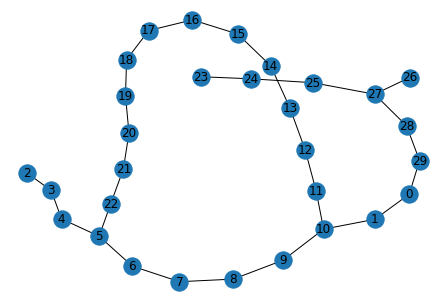

In [24]:
import matplotlib.pyplot as plt
nx.draw(ws, with_labels=True)

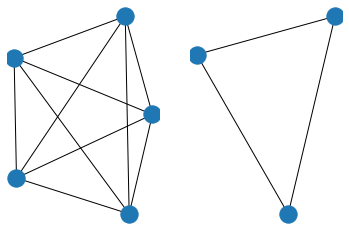

In [25]:
plt.subplot(121)
nx.draw(K_5, with_labels=False)
plt.subplot(122)
nx.draw(sub_K_5, with_labels=False)

---
## Analyzing graphs

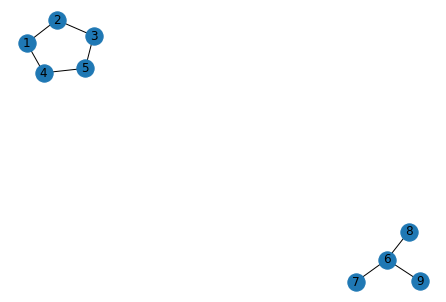

In [26]:
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (1, 4), (4, 5), (3, 5), (6, 7), (6, 9), (6, 8)])
nx.draw(G, with_labels=True)

<class 'set'> {1, 2, 3, 4, 5}


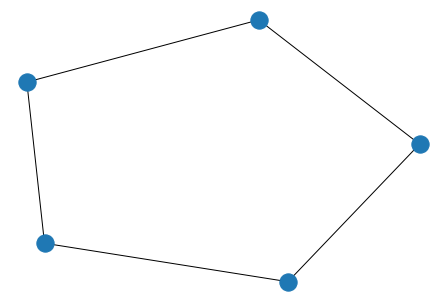

<class 'set'> {8, 9, 6, 7}


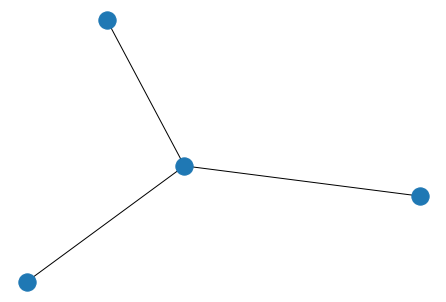

In [27]:
## Get the connected components
components = nx.connected_components(G)
for c in components:
    print(type(c), c)
    subGraph = nx.subgraph(G, c)
    nx.draw(subGraph)
    plt.show()
    print('=============================================')

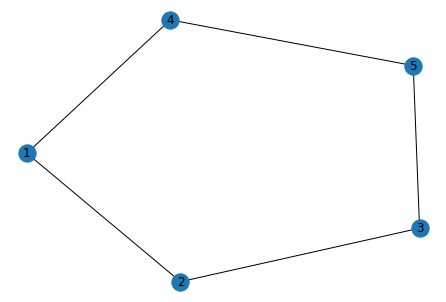

Shortest path from node 1 to node 5: [1, 4, 5]
length of shortest path: 3


In [28]:
## Find the shortest of component with node 1 to node 5
subGraph = nx.subgraph(G, [1,2, 3,4,5])
nx.draw(subGraph, with_labels=True)
plt.show()
print('=============================================')
shortestPath = nx.dijkstra_path(subGraph, 1, 5)
print(f'Shortest path from node 1 to node 5: {shortestPath}')
print(f'length of shortest path: {len(shortestPath)}')

# Hands-on 1
### NetworkX
a.	Create a graph, which has five nodes and can be formed as a ring (with edges (1,2), (2,3), (3,4), (4,5), (5,1)).
Find the **average clustering coefficient** of this graph, and calculate the value by hand to check whether the value is correct or not.



In [29]:
G_a = nx.Graph()
G_a.add_edges_from([(1,2), (2,3), (3,4), (4,5), (5,1)])
print(G_a.nodes)
print('average clustering coefficient', nx.average_clustering(G_a))

[1, 2, 3, 4, 5]
average clustering coefficient 0.0


b.	Create a complete graph with 5 nodes by graph generator.
Find the average degree and plot the graph with no node label.


average neighbor degree: {0: 4.0, 1: 4.0, 2: 4.0, 3: 4.0, 4: 4.0}


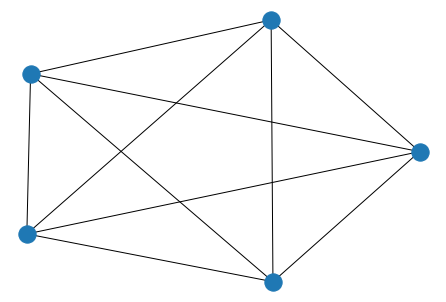

In [30]:
G_b = nx.complete_graph(5)
print('average neighbor degree:', nx.average_neighbor_degree(G_b))
nx.draw(G_b)

c.	Load our graph data “elliptic_txs_edgelist.csv”, and do the following things.
1.	Model the graph as a directed graph. The first entry is the start node, the second is the end node.
2.	Get the number of nodes
3.	Get the number of edges
4.	Get the number of weakly connected component
5.	Plot the top three smallest component according to the number of nodes.

In [31]:
import pandas as pd
df = pd.read_csv('elliptic_txs_edgelist.csv') 
df.head()

,txId1,txId2
0,230425980,5530458
1,232022460,232438397
2,230460314,230459870
3,230333930,230595899
4,232013274,232029206


In [32]:
DG = nx.DiGraph()
for i in range(len(df)):
  lst = []
  lst.append(df.iloc[i,0])
  lst.append(df.iloc[i,1])
  list_to_tuple = tuple(lst)
  DG.add_edges_from([list_to_tuple])

In [33]:
print('number of nodes:', DG.number_of_nodes())
print('number of edges: ', DG.number_of_edges())
print('number of weakly connected components:', nx.number_weakly_connected_components(DG))

number of nodes: 203769
number of edges:  234355
number of weakly connected components: 49


> **Definition** <br>


*   Strongly connected: A directed graph is strongly connected if there is a path from a to b and a path from b to a whenever a and b are vertices in the graph.
*   Weakly connected: A directed graph is weakly connected there is a path between every two vertices in the underlying undirected graph, which is the undirected grapg obtained by ignoring the directions of the edges of the directed graph.



In [34]:
lst = sorted(nx.weakly_connected_components(DG), key=len, reverse=False)
print('top three smallest component', lst[0:3])

top three smallest component [{286926852, 235247621, 294461448, 294299657, 294391827, 294299670, 259190807, 39747608, 294391834, 216522779, 180723741, 294391840, 294252576, 294447139, 294438947, 294391845, 294242346, 294350890, 294338604, 294391850, 245366834, 294391859, 294246452, 294486069, 294391867, 294338619, 294240320, 294236224, 294391873, 239628358, 294508614, 294391880, 108030025, 294387786, 294461513, 294391887, 294383698, 294370632, 204441684, 294391893, 294260824, 294240345, 294391900, 294236254, 294201442, 294264933, 294305894, 294391912, 248422506, 210415723, 294307949, 294391918, 294299759, 294307952, 294350962, 294307957, 294209654, 294209657, 109521022, 294326400, 294305926, 294391943, 294326410, 294326414, 293953681, 294326418, 294310035, 128675988, 294508692, 294391955, 294326428, 278241438, 294305950, 294391968, 294326433, 281010340, 90392742, 294305959, 180568230, 294326441, 294502571, 294510766, 294391983, 294326448, 205660337, 294398130, 294512819, 99465393, 2943

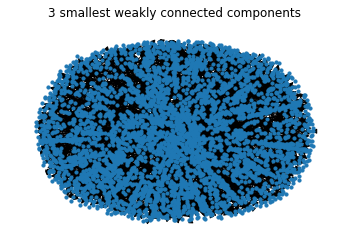

In [35]:
n = 3
smallest_components = sorted(nx.weakly_connected_components(DG), key=len, reverse=False)[:n]
for index,component in enumerate(smallest_components):
    smallest_subgraph = DG.subgraph(component)
    # print(smallest_subgraph.nodes())
    # print(smallest_subgraph.edges())
    plt.title('{} smallest weakly connected components'.format(index+1))
    nx.draw(smallest_subgraph, node_size = 10)
    plt.savefig('{}_smallest_weakly_connected_components.png'.format(index+1))
plt.draw()

### Karate Club - Node Classification
1.	Loading dataset “facebook” by karateclub.dataset.GraphReader. 




In [36]:
# !pip install karateclub
from karateclub import GraphReader
reader = GraphReader("facebook")
graph = reader.get_graph()
target = reader.get_target()

/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


2.	Get the node embedding of the graph by any kinds of the unsupervised node embedding provided in karateclub.

In [37]:
from karateclub import Diff2Vec
model = Diff2Vec(diffusion_number=2, diffusion_cover=20, dimensions=16)
model.fit(graph)
X = model.get_embedding()

3.	To evaluate the quality of the node embedding, you need to take a downstream task and see the performance of this task.
Here we’ll use Logistic Regression in Scikit-Learn to train and test the node label.
4.	Notice that you can use train_test_split or cross_validate or any kind of data splitting function you like. Take it easy to practice these modules and try to make the performance better!

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

In [52]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

downstream_model = LogisticRegression(random_state=0).fit(X_train, y_train)
y_hat = downstream_model.predict(X_test)
auc = accuracy_score(y_test, y_hat)
print('AUC: {:.4f}'.format(auc))

AUC: 0.5797
